In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

# 월 코드
month_code = ['1609459200', '1612137600', '1614556800', '1617235200','1619827200', '1622505600', '1625097600','1627776000', '1630454400', '1633046400', '1635724800', '1638316800', 
              '1640995200', '1643673600', '1646092800', '1648771200', '1651363200', '1654041600']
# 개인 토픽
topics = ['howto', 'education', 'science', 'all']

# 조회수 url
viewed_url = ['https://playboard.co/youtube-ranking/most-viewed-','-channels-in-south-korea-monthly?period=']
# 인기순위 url
total_popular_url = 'https://playboard.co/youtube-ranking/most-popular-all-channels-in-south-korea-monthly?period='

# 특정월 url 생성 테스트
for topic in topics:
    print(topic.join(viewed_url)+month_code[0])
    
print(total_popular_url+month_code[0])

https://playboard.co/youtube-ranking/most-viewed-howto-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-viewed-education-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-viewed-science-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-viewed-all-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-popular-all-channels-in-south-korea-monthly?period=1609459200


In [2]:
# 조회수 순위 차트 크롤링
# url 내의 표에서 1위 부터 rank 순위 까지의 자료 찾기
def get_top_viewed(url,df_dict, rank = 1):
#     print(url)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    tabel = soup.select_one('table.sheet > tbody')
    
    if tabel == None:
        for i in range(rank):
            df_dict['순위'].append(0)
            df_dict['채널명'].append(np.nan)
            df_dict['태그'].append([])
            df_dict['조회수'].append(np.nan)
    else:
        trs = tabel.select('tr.chart__row')
        r = 0
        while True:
            tr = trs[r]
            name = np.nan
            tags = []
            month_rank = 0
            viewed = np.nan

            try:
                name = tr.find('h3').text
                tag_lis = tr.select('ul.name__tags > li.ttags__item')
                for tag_li in tag_lis:
                    tags.append(tag_li.text)
                month_rank = tr.select_one('div.current').text
                viewed = tr.select_one('td.score').text
                viewed = float(viewed.replace(',',''))
            except:
                print('ad')
                r += 1
                continue

            df_dict['순위'].append(month_rank)
            df_dict['채널명'].append(name)
            df_dict['태그'].append(tags)
            df_dict['조회수'].append(viewed)

            if int(month_rank) == rank:
                break
            r += 1
    return df_dict


def get_top_popular(url,df_dict, rank = 1):
#     print(url)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    tabel = soup.select_one('table.sheet > tbody')
    
    trs = tabel.select('tr.chart__row')
    if trs == None:
        trs= [None]
    r = 0
    
    while True:
        tr = trs[r]

        name = np.nan
        tags = []
        month_rank = 0
        viewed = np.nan
        likes = np.nan
        
        try:
            name = tr.find('h3').text
            tag_lis = tr.select('ul.name__tags > li.ttags__item')
            for tag_li in tag_lis:
                tags.append(tag_li.text)
            month_rank = tr.select_one('div.current').text

            score_tds = tr.select('td.score')
            viewed = score_tds[0].select_one('span').text
            viewed = float(viewed.replace(',',''))

            likes = score_tds[1].select_one('span').text
        except:
            print('ad')
            r += 1
            continue
                
        df_dict['순위'].append(month_rank)
        df_dict['채널명'].append(name)
        df_dict['태그'].append(tags)
        df_dict['조회수'].append(viewed)
        df_dict['likes'].append(likes)
        
        if int(month_rank) == rank:
            break
        r += 1
    return df_dict

In [132]:
# 전체 토픽의 월별 인기순위 1위
df_dict ={'순위':[], '채널명':[], '태그':[], '조회수':[], 'likes':[]} 
for mon in month_code:
#     print(month_code.index(mon), end = ': ')
    df_dict = get_top_popular(total_popular_url+mon,df_dict)

top_popular_df = pd.DataFrame(df_dict, index = pd.period_range('2021-01-01','2022-06-30',freq = 'm').to_list())
top_popular_df

,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-02,1,BANGTANTV,"[ #BTS , #방탄 ]",82683282.0,1.8천만
2021-03,1,BLACKPINK,"[ #YG , #와이지 ]",253043478.0,2.1천만
2021-04,1,BANGTANTV,"[ #BTS , #방탄 ]",142585706.0,2.6천만
2021-05,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",442902465.0,3.5천만
2021-06,1,BANGTANTV,"[ #BTS , #방탄 ]",288032959.0,3.7천만
2021-07,1,BANGTANTV,"[ #BTS , #방탄 ]",486782715.0,7.4천만
2021-08,1,쇼츠갤러리,[],425145879.0,2.4백만
2021-09,1,BLACKPINK,"[ #YG , #와이지 ]",448201000.0,3.6천만
2021-10,1,BLACKPINK,"[ #YG , #와이지 ]",210293347.0,9백만


In [3]:
# 전체 토픽의 월별 인기순위 1위 ~ 15위
df_dict ={'순위':[], '채널명':[], '태그':[], '조회수':[], 'likes':[]} 
for mon in month_code:
#     print(month_code.index(mon), end = ': ')
    df_dict = get_top_popular(total_popular_url+mon,df_dict, rank = 15)

ind = pd.period_range('2021-01-01','2022-06-30',freq = 'm').to_list()*15
top_15_popular_df = pd.DataFrame(df_dict, index = sorted(ind))
top_15_popular_df

ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad


,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-01,2,tvN drama,"[ #tvN , #DRAMA ]",146548852.0,3.1백만
2021-01,3,Samsung,"[ #samsung , #mobile ]",147055306.0,66.9만
2021-01,4,MBCNEWS,"[ #mbc , #news ]",121795611.0,1.2백만
2021-01,5,진성호방송,"[ #인물 , #사회 ]",67842701.0,5.3백만
...,...,...,...,...,...
2022-06,11,KBS News,"[ #kbs , #뉴스 ]",103736906.0,77.7만
2022-06,12,M2,"[ #M2 , #엠투 ]",60267324.0,4.9백만
2022-06,13,채널A 뉴스,"[ #채널A , #시사 ]",92172782.0,1.5백만
2022-06,14,성창경 TV,"[ #성창경TV , #성창경유튜브 ]",44686667.0,6백만


In [5]:
top_15_popular_df[:20]

,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-01,2,tvN drama,"[ #tvN , #DRAMA ]",146548852.0,3.1백만
2021-01,3,Samsung,"[ #samsung , #mobile ]",147055306.0,66.9만
2021-01,4,MBCNEWS,"[ #mbc , #news ]",121795611.0,1.2백만
2021-01,5,진성호방송,"[ #인물 , #사회 ]",67842701.0,5.3백만
2021-01,6,Stop Motion Cooking,"[ #cooking , #asmr ]",112447275.0,8천
2021-01,7,SBS 뉴스,"[ #SBSNEWS , #sbs ]",91520561.0,72만
2021-01,8,배승희 변호사,"[ #bae seung hee lawyer , #배승희 ]",40858699.0,5.5백만
2021-01,9,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",38642488.0,5.5백만
2021-01,10,YTN,"[ #YTN , #LIVE ]",83309188.0,66.8만


In [187]:
# 전체 토픽, 특정 토픽의 조회수 순위 1위
viewed_dfs = {}
for topic in topics:
    print('-'*30, '\n', topic, ':')
    df_dict ={'순위':[], '채널명':[], '태그':[], '조회수':[]} 
    for mon in month_code:
#         print(month_code.index(mon), end = ': ')
        df_dict = get_top_viewed(topic.join(viewed_url)+mon, df_dict)
#         print('채널명 : {0:10}, 태그 : {1}, 조회수 : {2:10}'.format(values[0], values[1], values[2]))

    viewed_df = pd.DataFrame(df_dict, index = pd.period_range('2021-01-01','2022-06-30',freq = 'm'))
    viewed_dfs[topic] = viewed_df
viewed_dfs[topics[0]]

------------------------------ 
 howto :
------------------------------ 
 education :
------------------------------ 
 science :
------------------------------ 
 all :


,순위,채널명,태그,조회수
2021-01,0,NaN,[],NaN
2021-02,0,NaN,[],NaN
2021-03,0,NaN,[],NaN
2021-04,0,NaN,[],NaN
2021-05,1,Yummy Waffle 야미와플,"[ #Yummy , #Waffle ]",38935630.0
2021-06,1,YogaHoliday,"[ #yogatoday , #yoga massage ]",110946503.0
2021-07,1,YogaHoliday,"[ #yogatoday , #yoga massage ]",65970402.0
2021-08,1,ROOKIE MING 루키밍,"[ #slime , #rookieming ]",69415860.0
2021-09,1,ROOKIE MING 루키밍,"[ #slime , #rookieming ]",70017273.0
2021-10,1,쇼츠갤러리 tiktok,"[ #웃긴영상 , #동물 ]",114418328.0


In [188]:
viewed_dfs[topics[1]]

,순위,채널명,태그,조회수
2021-01,1,스위트티비 SweetTV,"[ #장난감 , #놀이 ]",136648367.0
2021-02,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",72135733.0
2021-03,1,스위트티비 SweetTV,"[ #장난감 , #놀이 ]",97339243.0
2021-04,1,스위트티비 SweetTV,"[ #장난감 , #놀이 ]",108905985.0
2021-05,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",58035190.0
2021-06,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",49414221.0
2021-07,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",66542989.0
2021-08,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",98427573.0
2021-09,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",82265447.0
2021-10,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",94481365.0


In [191]:
viewed_dfs[topics[2]]

,순위,채널명,태그,조회수
2021-01,1,Samsung,"[ #samsung , #mobile ]",139915851.0
2021-02,1,Samsung,"[ #samsung , #mobile ]",21373247.0
2021-03,1,Samsung,"[ #samsung , #mobile ]",67158587.0
2021-04,1,Samsung,"[ #samsung , #mobile ]",72171001.0
2021-05,1,Samsung,"[ #samsung , #mobile ]",42711664.0
2021-06,1,Samsung,"[ #samsung , #mobile ]",30394049.0
2021-07,1,ITSub잇섭,"[ #it , #전자제품 ]",18976829.0
2021-08,1,새로운거신기한거재밌는거 NewAmazingFun,"[ #신기한거 , #새로운거 ]",147895228.0
2021-09,1,새로운거신기한거재밌는거 NewAmazingFun,"[ #신기한거 , #새로운거 ]",75538531.0
2021-10,1,Samsung,"[ #samsung , #mobile ]",113259374.0


In [192]:
viewed_dfs[topics[3]]

,순위,채널명,태그,조회수
2021-01,1,BLACKPINK,"[ #YG , #와이지 ]",602459523.0
2021-02,1,BLACKPINK,"[ #YG , #와이지 ]",486769203.0
2021-03,1,BLACKPINK,"[ #YG , #와이지 ]",730292850.0
2021-04,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",631260181.0
2021-05,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",956989989.0
2021-06,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",701819165.0
2021-07,1,BANGTANTV,"[ #BTS , #방탄 ]",891562499.0
2021-08,1,BANGTANTV,"[ #BTS , #방탄 ]",598802040.0
2021-09,1,BLACKPINK,"[ #YG , #와이지 ]",820595696.0
2021-10,1,BLACKPINK,"[ #YG , #와이지 ]",696333772.0


토픽 별 조회수 1위 수치 변화 비교

In [193]:
topics

['howto', 'education', 'science', 'all']

In [194]:
view_top_path = './topic_view_top1/'
for topic in topics:
    viewed_dfs[topic].to_csv(view_top_path + f'{topic}_view_top.csv', encoding = 'utf-8', index = True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.style.use('ggplot')



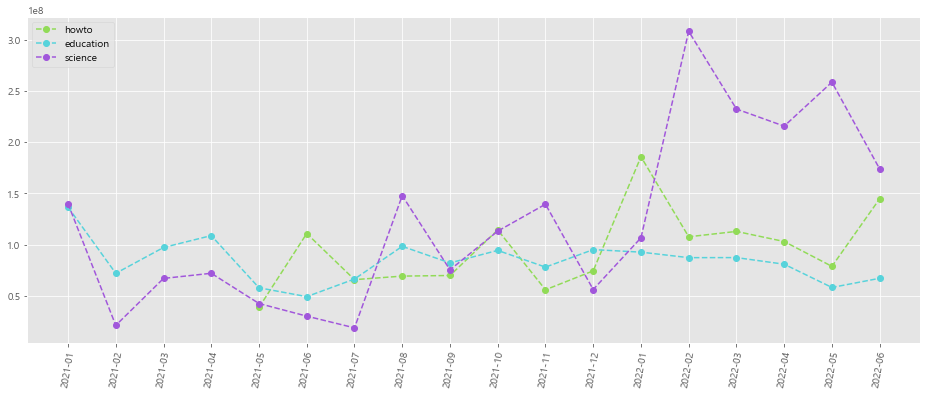

In [232]:
colors = sns.color_palette('hls', 4)
    
plt.figure(figsize=(16,6))
plt.xticks(range(len(viewed_dfs[topics[-1]].index)), viewed_dfs[topics[-1]].index, rotation=80)
    
for topic in topics[:-1]:
    plt.plot(range(18),viewed_dfs[topic]['조회수'],
             'o--', color = colors[topics.index(topic)+1])

# plt.bar(range(18), viewed_dfs[topics[-1]]['조회수'], alpha = 0.5, color = colors[0])


plt.legend(topics,loc = 2)

science 분야 영상 채널이 2022년 2월 에 급증
- 

통합 1위의 채널과의 조회수 비교

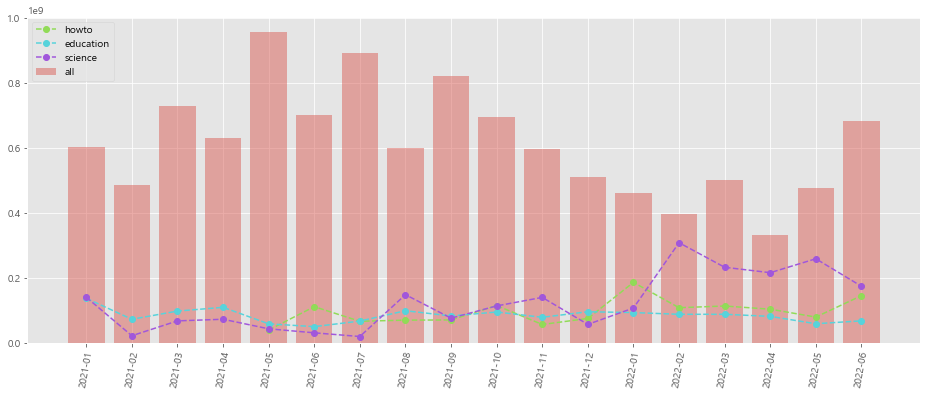

In [230]:
colors = sns.color_palette('hls', 4)
    
plt.figure(figsize=(16,6))
plt.xticks(range(len(viewed_dfs[topics[-1]].index)), viewed_dfs[topics[-1]].index, rotation=80)
    
for topic in topics[:-1]:
    plt.plot(range(18),viewed_dfs[topic]['조회수'],
             'o--', color = colors[topics.index(topic)+1])

plt.bar(range(18), viewed_dfs[topics[-1]]['조회수'], alpha = 0.5, color = colors[0])


plt.legend(topics,loc = 2)

22년 2월에는 과학분야가 1위의 조회수와 유사해 보이지만 그외에는 세 분야 모두 비교적으로 적은 조회수를 보인다.

전체 분석
  
- 조원별로 나눈 토픽별 자료들을 모아 분석

In [133]:
# 조원들이 크롤링한 자료 불러오기
view_top_path = './topic_view_top1/'
import os
topics = []
viewed_dfs = {}
for f_name in os.listdir(view_top_path):
    topic =  f_name.split('_view')[0].split('.csv')[0]
#     re.search('.+(?=_view)', re.search('.+(?=.csv)', f_name).group())
    topics.append(topic)
    
    topic_df = pd.read_csv(view_top_path+f_name, encoding = 'utf-8', index_col=0)
    print(topic, list(topic_df.columns))
    if topic_df['조회수'].dtype == 'object':
        topic_df['조회수'] = topic_df['조회수'].str.replace(',', '').astype('float')
    topic_df.rename(columns = {'채널이름': '채널명'}, inplace=True)
    viewed_dfs[topic] = topic_df
    
    

all ['순위', '채널명', '태그', '조회수']
animals ['채널명', '조회수']
baking ['채널명', '조회수']
body-building ['채널명', '조회수']
camping ['채널명', '조회수']
cat ['채널명', '조회수']
comedy ['채널이름', '조회수']
cooking ['채널명', '조회수']
cover-dance ['채널명', '조회수']
cover-song ['채널명', '조회수']
dog ['채널명', '조회수']
education ['순위', '채널명', '태그', '조회수']
entertainment ['채널이름', '조회수']
fashion ['채널명', '조회수']
film ['채널이름', '조회수']
gaming ['채널명', '조회수']
home_workout ['채널명', '조회수']
howto ['순위', '채널명', '태그', '조회수']
lookbook ['채널명', '조회수']
makeup ['채널명', '조회수']
mukbang ['채널명', '조회수']
music ['채널명', '조회수']
news ['채널명', '조회수']
science ['순위', '채널명', '태그', '조회수']
sneakers ['채널명', '조회수']
sports ['채널이름', '조회수']
stocks ['채널명', '조회수']
travel ['채널이름', '조회수']
trucker ['채널명', '조회수']
v-tuber ['채널명', '조회수']
vehicles ['채널이름', '조회수']
vlog ['채널이름', '조회수']


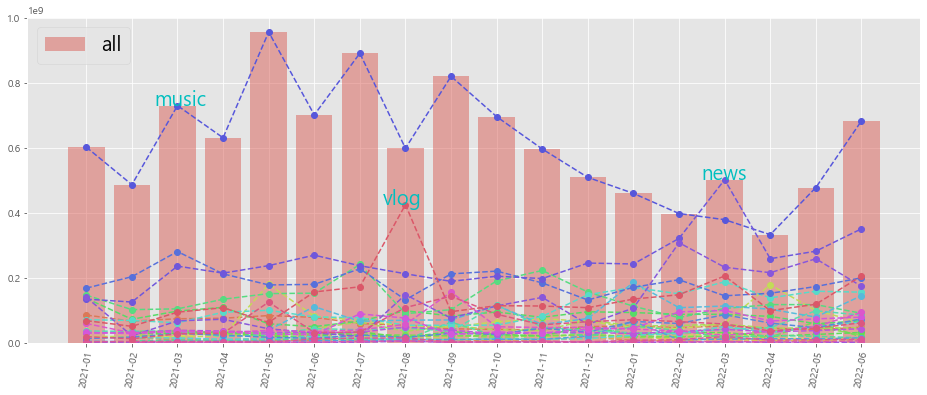

In [152]:
colors = sns.color_palette('hls', len(topics))
    
ind = pd.period_range('2021-01-01','2022-06-30',freq = 'm')

plt.figure(figsize=(16,6))
plt.xticks(range(len(ind)), ind, rotation=80)
    
plt.bar(range(18), viewed_dfs[topics[0]]['조회수'], alpha = 0.5, color = colors[0])
plt.legend([topics[0]],loc = 2, fontsize= 20)
for topic in topics[1:]:
    views = viewed_dfs[topic]['조회수']
    plt.plot(range(18),views,
             'o--', color = colors[topics.index(topic)])


#     plt.text(13.5,views.iloc[7] , topic, fontsize=20, color='green')

plt.text(6.5,viewed_dfs['vlog']['조회수'].iloc[7] , 'vlog', fontsize=20, color='c')
plt.text(13.5,viewed_dfs['news']['조회수'].iloc[14] +100, 'news', fontsize=20, color='c')
plt.text(1.5,viewed_dfs['music']['조회수'].iloc[2] +100, 'music', fontsize=20, color='c')
plt.show()



음악 분야가 매월 가장 높은 조회수를 보이며  
22년 3월 news분야가 가장 조회수가 높았다. 3월 9일 시행된 대통령 선거의 영향
21년 8월 vlog분야의 조회수 급상승이 있었는데 이는 휴가시즌의 영향으로 보인다.


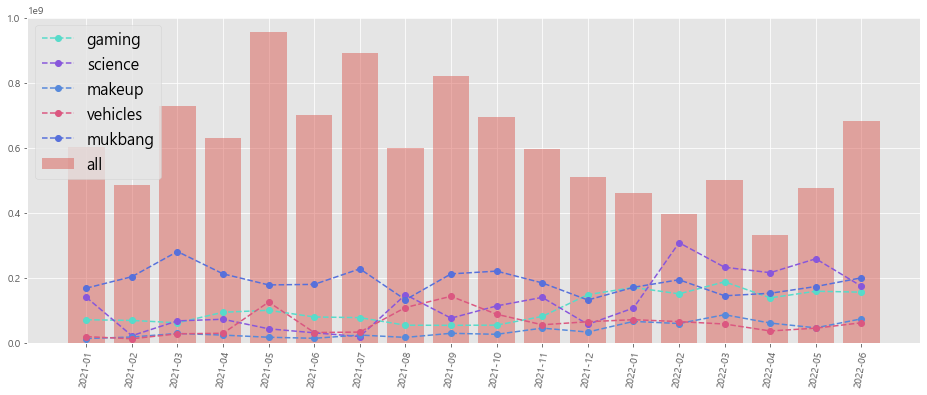

In [169]:
selected_topic = ['gaming', 'science', 'makeup', 'vehicles','mukbang']

plt.figure(figsize=(16,6))
plt.xticks(range(len(ind)), ind, rotation=80)
    
plt.bar(range(18), viewed_dfs[topics[0]]['조회수'], alpha = 0.5, color = colors[0])
for topic in selected_topic:
    views = viewed_dfs[topic]['조회수']
    plt.plot(range(18),views,
             'o--', color = colors[topics.index(topic)])
    
plt.legend( selected_topic +[topics[0]],loc = 2, fontsize= 16)

plt.show()



월별 토픽들의 조회수 순위 구하기

In [92]:

merged_df = pd.DataFrame(index = range(18))
for topic in topics[1:]:
    topic_df = viewed_dfs[topic][['채널명', '조회수']].copy()
    topic_df.columns = [topic+'채널명', topic+'조회수']
    merged_df = pd.concat([merged_df, topic_df], axis = 1)   
# merged_df.index = ind
merged_df

,animals채널명,animals조회수,baking채널명,baking조회수,body-building채널명,body-building조회수,camping채널명,camping조회수,cat채널명,cat조회수,...,travel채널명,travel조회수,trucker채널명,trucker조회수,v-tuber채널명,v-tuber조회수,vehicles채널명,vehicles조회수,vlog채널명,vlog조회수
0,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,85081740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,푸드킹덤 Food Kingdom,59119166.0,NaN,NaN,ShiningStar,2549400.0,한문철 TV,18597173.0,진성호방송,67842701.0
1,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,66270793.0,Boone Bake분 베이크,15041208.0,피지컬갤러리,15900692.0,Rirang OnAir,2810020.0,크림히어로즈,16137618.0,...,푸드킹덤 Food Kingdom,29946210.0,트럭커 디젤집시의 Vlog,1523587.0,아구이뽀 A924,3876929.0,한문철 TV,12034246.0,진성호방송,50365223.0
2,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,73697164.0,Boone Bake분 베이크,8947082.0,피지컬갤러리,14528418.0,캠핑제국,5713269.0,밀키복이탄이MilkyBokiTan,19462122.0,...,푸드킹덤 Food Kingdom,36839831.0,군복남자,1495164.0,아구이뽀 A924,3477273.0,한문철 TV,27339413.0,진성호방송,93920566.0
3,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,75296671.0,Cooking tree 쿠킹트리,7265231.0,피지컬갤러리,8399004.0,캠핑제국,7243472.0,금수강산Kpetworld,32814388.0,...,야미보이 Yummyboy,31207792.0,군복남자,1689721.0,요극,3411560.0,한문철 TV,28940032.0,진성호방송,107751239.0
4,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,83486054.0,Cooking tree 쿠킹트리,7429295.0,지피티,13803434.0,은하캠핑,11481395.0,밀키복이탄이MilkyBokiTan,20000775.0,...,푸드킹덤 Food Kingdom,37867434.0,권마키,2215444.0,홀로라이브KR 번역&자막,981984.0,Hankook Tire Global,125092472.0,NCT DREAM,62261881.0
5,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,78049300.0,Cooking tree 쿠킹트리,7431352.0,피지컬갤러리,19538685.0,캠핑제국,10487107.0,밀키복이탄이MilkyBokiTan,17718141.0,...,피기보이 PiggyBoy,34121156.0,빠꾸왕간디,1117346.0,오리고기 ORIGOGI,11869237.0,한문철 TV,31267383.0,"구독자90,000명만들기",156212737.0
6,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,59003796.0,서담 seodam,14076915.0,헬창TV Korea Fitness HellchangTV,11023292.0,캠핑제국,7584436.0,크집사,17149721.0,...,야미보이 Yummyboy,39318482.0,권마키,4250374.0,오리고기 ORIGOGI,14107080.0,한문철 TV,32648445.0,짧은 영상 shorts video,172121317.0
7,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,53589577.0,조꽁드Joconde's baking,7929312.0,지피티,11688829.0,캠핑제국,14266663.0,크집사,19576139.0,...,푸드킹덤 Food Kingdom,56414137.0,빠꾸왕간디,5235450.0,오리고기 ORIGOGI,14539309.0,한문철 TV,108318784.0,쇼츠갤러리,425145879.0
8,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,42890636.0,조꽁드Joconde's baking,9558681.0,피지컬갤러리,8192377.0,승우아빠,13886970.0,시멘트,20867486.0,...,Imagine your Korea,156046213.0,권마키,1456030.0,번역하는 댕댕이,2087741.0,한문철 TV,142896200.0,진성호방송,95513544.0
9,SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!,40825430.0,Cooking tree 쿠킹트리,5788011.0,피지컬갤러리,12256301.0,캠핑제국,7743002.0,시멘트,25273408.0,...,I'm perfect,49003323.0,권마키,2777722.0,번역하는 댕댕이,3194764.0,한문철 TV,87552956.0,진성호방송,114011867.0


In [93]:
merge_view_df.iloc[0].sort_values(ascending = False)

music조회수            602459523.0
mukbang조회수          167980166.0
entertainment조회수    146548852.0
science조회수          139915851.0
education조회수        136648367.0
news조회수             134218534.0
animals조회수           85081740.0
gaming조회수            70698418.0
vlog조회수              67842701.0
travel조회수            59119166.0
film조회수              36027516.0
stocks조회수            31721997.0
sports조회수            29932434.0
comedy조회수            19961738.0
vehicles조회수          18597173.0
makeup조회수            12678601.0
lookbook조회수           4512840.0
v-tuber조회수            2549400.0
sneakers조회수            865993.0
baking조회수                   NaN
body-building조회수            NaN
camping조회수                  NaN
cat조회수                      NaN
cooking조회수                  NaN
cover-dance조회수              NaN
cover-song조회수               NaN
dog조회수                      NaN
fashion조회수                  NaN
home_workout조회수             NaN
howto조회수                    NaN
trucker조회수                  NaN
Name: 20

In [94]:
merge_view_df = merged_df.filter(like='조회수')
month_top_topic = merge_view_df.apply(lambda x :pd.Series([topic.strip('조회수') for topic in  list(x.sort_values(ascending = False).index)]) , axis = 1)
month_top_topic

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,music,mukbang,entertainment,science,education,news,animals,gaming,vlog,travel,...,camping,cat,cooking,cover-dance,cover-song,dog,fashion,home_workout,howto,trucker
1,music,mukbang,news,entertainment,education,gaming,animals,vlog,cover-song,film,...,body-building,baking,vehicles,fashion,v-tuber,camping,lookbook,trucker,sneakers,howto
2,music,mukbang,news,entertainment,education,vlog,animals,science,gaming,cover-dance,...,body-building,home_workout,baking,fashion,camping,lookbook,v-tuber,sneakers,trucker,howto
3,music,news,mukbang,entertainment,education,vlog,gaming,animals,science,sports,...,home_workout,body-building,fashion,baking,camping,lookbook,v-tuber,trucker,sneakers,howto
4,music,news,comedy,mukbang,entertainment,vehicles,gaming,animals,vlog,education,...,makeup,body-building,home_workout,camping,fashion,baking,lookbook,trucker,v-tuber,sneakers
5,music,news,mukbang,vlog,entertainment,howto,comedy,gaming,animals,education,...,home_workout,cat,makeup,v-tuber,fashion,camping,baking,lookbook,trucker,sneakers
6,music,entertainment,news,mukbang,vlog,stocks,gaming,comedy,education,howto,...,cat,v-tuber,baking,home_workout,body-building,fashion,camping,lookbook,trucker,sneakers
7,music,vlog,news,science,mukbang,vehicles,education,entertainment,stocks,howto,...,dog,v-tuber,camping,home_workout,body-building,fashion,lookbook,baking,trucker,sneakers
8,music,mukbang,news,travel,vehicles,entertainment,vlog,education,science,howto,...,cover-song,cat,camping,lookbook,baking,home_workout,body-building,v-tuber,trucker,sneakers
9,music,mukbang,news,entertainment,film,howto,vlog,science,education,vehicles,...,fashion,cover-dance,body-building,home_workout,lookbook,camping,baking,v-tuber,sneakers,trucker


In [160]:

topic_rank_df = pd.DataFrame(index = ind)
for topic in topics[1:]:
    ranks = month_top_topic.apply(lambda x: list(x).index(topic), axis = 1)
    topic_rank_df[topic] = list(ranks)
topic_rank_df

,animals,baking,body-building,camping,cat,comedy,cooking,cover-dance,cover-song,dog,...,news,science,sneakers,sports,stocks,travel,trucker,v-tuber,vehicles,vlog
2021-01,6,19,20,21,22,13,23,24,25,26,...,5,3,18,12,11,9,30,17,14,8
2021-02,6,22,21,26,19,17,16,14,8,12,...,2,15,29,10,13,11,28,25,23,7
2021-03,6,23,21,25,19,20,15,9,13,16,...,2,7,28,10,14,11,29,27,18,5
2021-04,7,24,22,25,10,19,17,16,13,11,...,1,8,29,9,12,14,28,27,15,5
2021-05,7,26,22,24,20,2,18,17,14,19,...,1,10,30,13,15,12,28,29,5,8
2021-06,8,27,20,26,22,6,10,14,17,19,...,1,15,30,16,18,12,29,24,13,3
2021-07,11,23,25,27,21,7,10,19,17,14,...,2,20,30,16,5,13,29,22,15,4
2021-08,12,28,25,23,18,13,16,19,17,21,...,2,3,30,14,8,10,29,22,5,1
2021-09,14,25,27,23,22,13,12,20,21,17,...,2,8,30,15,19,3,29,28,4,6
2021-10,13,27,23,26,18,10,14,22,20,19,...,2,7,29,16,15,12,30,28,9,6


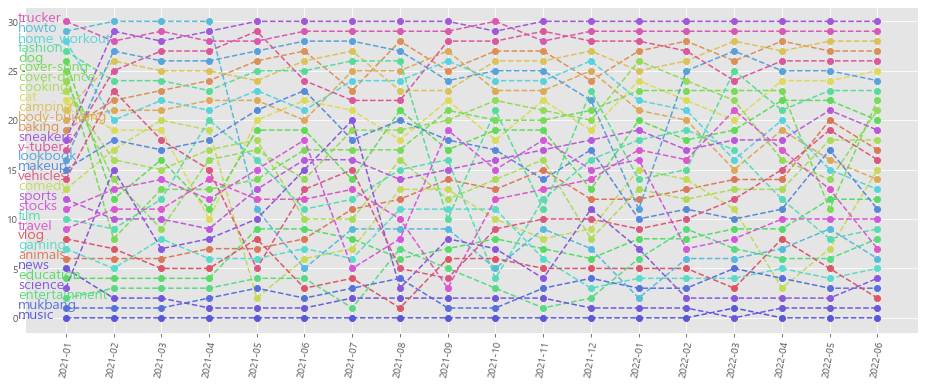

In [177]:
plt.figure(figsize=(16,6))
plt.xticks(range(len(ind)), ind, rotation=80)
for topic in topics[1:]:
    r = topic_rank_df[topic]
    plt.plot(range(18),r,
             'o--', color = colors[topics.index(topic)])
    
    plt.text(-1,r.iloc[0] , topic, fontsize=14, color=colors[topics.index(topic)])

    

- trucker, sneakers 분야는 계속 하위권을 유지중
- music, mukbang, news, entertainment 분야는 상위권을 유지중

In [178]:
선택 분야별 순위 변동 비교

SyntaxError: invalid syntax (1756640219.py, line 1)

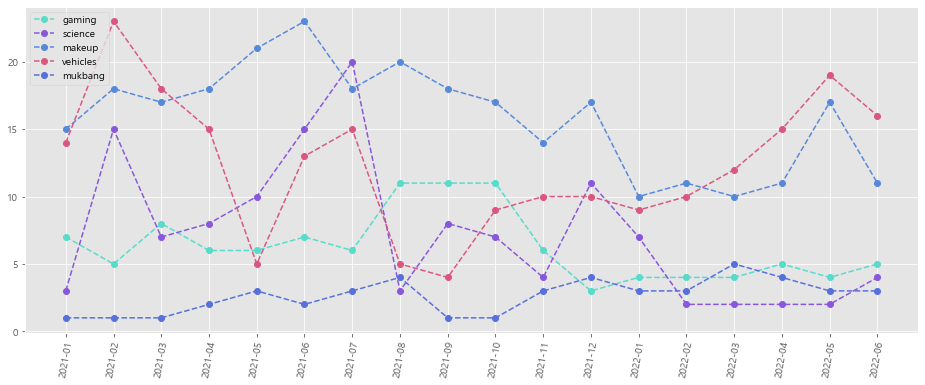

In [166]:
plt.figure(figsize=(16,6))
plt.xticks(range(len(ind)), ind, rotation=80)
for topic in selected_topic:
    r = topic_rank_df[topic]
    plt.plot(range(18),r,
             'o--', color = colors[topics.index(topic)])
    
plt.legend(selected_topic,loc = 2)

- 게임 분야가 21년 12월 이후부터 높은 순위를 유지중
- 과학 분야는 순위 변동이 크다
- 먹방 분야는 지속적으로 높은 순위를 보인다.

월별 토픽들의 조회수 순위  > 채널명

In [98]:
month_top_topic_chanel = month_top_topic.copy()
for i, x in month_top_topic_chanel.iterrows():
    for j in range(len(x)):
        topic = x.iloc[j]
        month_top_topic_chanel.iloc[i,j] = [topic, viewed_dfs[topic].loc[i]['채널명']]

month_top_topic_chanel.index = ind
month_top_topic_chanel

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
2021-01,"[music, BLACKPINK]","[mukbang, Jane ASMR 제인]","[entertainment, tvN drama]","[science, Samsung]","[education, 스위트티비 SweetTV]","[news, MBCNEWS]","[animals, SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!]","[gaming, 계향쓰 GH'S]","[vlog, 진성호방송]","[travel, 푸드킹덤 Food Kingdom]",...,"[camping, nan]","[cat, nan]","[cooking, nan]","[cover-dance, nan]","[cover-song, nan]","[dog, nan]","[fashion, nan]","[home_workout, nan]","[howto, nan]","[trucker, nan]"
2021-02,"[music, BLACKPINK]","[mukbang, Jane ASMR 제인]","[news, MBCNEWS]","[entertainment, tvN drama]","[education, 핑크퐁 (인기 동요・동화)]","[gaming, 계향쓰 GH'S]","[animals, SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!]","[vlog, 진성호방송]","[cover-song, JFlaMusic]","[film, 짤툰]",...,"[body-building, 피지컬갤러리]","[baking, Boone Bake분 베이크]","[vehicles, 한문철 TV]","[fashion, 핏더사이즈]","[v-tuber, 아구이뽀 A924]","[camping, Rirang OnAir]","[lookbook, 소신사장 SoshinTV]","[trucker, 트럭커 디젤집시의 Vlog]","[sneakers, 와디의 신발장]","[howto, nan]"
2021-03,"[music, BLACKPINK]","[mukbang, Jane ASMR 제인]","[news, MBCNEWS]","[entertainment, Stop Motion Cooking]","[education, 스위트티비 SweetTV]","[vlog, 진성호방송]","[animals, SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!]","[science, Samsung]","[gaming, 계향쓰 GH'S]","[cover-dance, ARTBEAT]",...,"[body-building, 피지컬갤러리]","[home_workout, 피지컬갤러리]","[baking, Boone Bake분 베이크]","[fashion, TRB 트렌드 리뷰 브랜드]","[camping, 캠핑제국]","[lookbook, 뀨tv kkyutv]","[v-tuber, 아구이뽀 A924]","[sneakers, 와디의 신발장]","[trucker, 군복남자]","[howto, nan]"
2021-04,"[music, HYBE LABELS]","[news, MBCNEWS]","[mukbang, Jane ASMR 제인]","[entertainment, Stop Motion Cooking]","[education, 스위트티비 SweetTV]","[vlog, 진성호방송]","[gaming, 계향쓰 GH'S]","[animals, SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!]","[science, Samsung]","[sports, SPOTV]",...,"[home_workout, Thankyou BUBU]","[body-building, 피지컬갤러리]","[fashion, 깡스타일리스트]","[baking, Cooking tree 쿠킹트리]","[camping, 캠핑제국]","[lookbook, 발리비키 - BALIBIKI]","[v-tuber, 요극]","[trucker, 군복남자]","[sneakers, 와디의 신발장]","[howto, nan]"
2021-05,"[music, HYBE LABELS]","[news, MBCNEWS]","[comedy, CJY中]","[mukbang, Street Foodie]","[entertainment, 트리라인treeline]","[vehicles, Hankook Tire Global]","[gaming, 계향쓰 GH'S]","[animals, SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!]","[vlog, NCT DREAM]","[education, 핑크퐁 (인기 동요・동화)]",...,"[makeup, 스마일밤 Smile Bam]","[body-building, 지피티]","[home_workout, 피지컬갤러리]","[camping, 은하캠핑]","[fashion, 깡스타일리스트]","[baking, Cooking tree 쿠킹트리]","[lookbook, 뀨tv kkyutv]","[trucker, 권마키]","[v-tuber, 홀로라이브KR 번역&자막]","[sneakers, 와디의 신발장]"
2021-06,"[music, HYBE LABELS]","[news, MBCNEWS]","[mukbang, Street Foodie]","[vlog, 구독자90,000명만들기]","[entertainment, Fast cooking]","[howto, YogaHoliday]","[comedy, CJY中]","[gaming, 계향쓰 GH'S]","[animals, SBS TV동물농장x애니멀봐 공식 유튜브 채널입니다!]","[education, 핑크퐁 (인기 동요・동화)]",...,"[home_workout, 피지컬갤러리]","[cat, 밀키복이탄이MilkyBokiTan]","[makeup, 진절미 Jinjeolme]","[v-tuber, 오리고기 ORIGOGI]","[fashion, 깡스타일리스트]","[camping, 캠핑제국]","[baking, Cooking tree 쿠킹트리]","[lookbook, 뀨tv kkyutv]","[trucker, 빠꾸왕간디]","[sneakers, 와디의 신발장]"
2021-07,"[music, BANGTANTV]","[entertainment, Fast cooking]","[news, MBCNEWS]","[mukbang, Jane ASMR 제인]","[vlog, 짧은 영상 shorts video]","[stocks, 엠빅뉴스]","[gaming, 계향쓰 GH'S]","[comedy, 대륙판눈요기TV]","[education, 핑크퐁 (인기 동요・동화)]","[howto, YogaHoliday]",...,"[cat, 크집사]","[v-tuber, 오리고기 ORIGOGI]","[baking, 서담 seodam]","[home_workout, Thankyou BUBU]","[body-building, 헬창TV Korea Fitness HellchangTV]","[fashion, 깡스타일리스트]","[camping, 캠핑제국]","[lookbook, 디테일 LookBook]","[trucker, 권마키]","[sneakers, 와디의 신발장]"
2021-08,"[music, BANGTANTV]","[vlog, 쇼츠갤러리]","[news, MBCNEWS]","[science, 새로운거신기한거재밌는거 NewAmazingFun]","[mukbang, Jane ASMR 제인]","[vehicles, 한문철 TV]","[education, 핑크퐁 (인기 동요・동화)]","[entertainment, Stop Motion Cooking]","[stocks, 엠빅뉴스]","[howto, ROOKIE MING 루키밍]",...,"[dog, [THE SOY]루퐁이네]","[v-tuber, 오리고기 ORIGOGI]","[camping, 캠핑제국]","[home_workout, Thankyou BUBU]","[body-building, 지피티]","[fashion, 신의손이선생 - DIY edigna]","[lookbook, 깡스타일리스트]","[baking, 조꽁드Joconde's baking]","[trucker, 빠꾸왕간디]","[sneake

In [179]:
채널명 별 월 순위 합 구하기

SyntaxError: invalid syntax (1569868610.py, line 1)

In [105]:
ranks = dict()
for col in month_top_topic_chanel.columns:
    for ch in month_top_topic_chanel[col]:
        print(ch)
        try:
            ranks[ch[1]][1] += col
        except:
            ranks[ch[1]] = [ch[0], col]
            
ranks

['music', 'BLACKPINK']
['music', 'BLACKPINK']
['music', 'BLACKPINK']
['music', 'HYBE LABELS']
['music', 'HYBE LABELS']
['music', 'HYBE LABELS']
['music', 'BANGTANTV']
['music', 'BANGTANTV']
['music', 'BLACKPINK']
['music', 'BLACKPINK']
['music', 'BLACKPINK']
['music', 'BANGTANTV']
['music', 'BLACKPINK']
['music', 'BLACKPINK']
['news', ' YTN']
['music', 'HYBE LABELS']
['music', 'HYBE LABELS']
['music', 'BANGTANTV']
['mukbang', 'Jane ASMR 제인']
['mukbang', 'Jane ASMR 제인']
['mukbang', 'Jane ASMR 제인']
['news', 'MBCNEWS']
['news', 'MBCNEWS']
['news', 'MBCNEWS']
['entertainment', 'Fast cooking']
['vlog', '쇼츠갤러리']
['mukbang', 'Hongyu ASMR 홍유']
['mukbang', 'Jane ASMR 제인']
['entertainment', 'BIBO와 장난감']
['news', 'MBCNEWS']
['news', ' YTN']
['news', ' YTN']
['music', 'BLACKPINK']
['news', ' YTN']
['news', 'MBCNEWS']
['news', 'MBCNEWS']
['entertainment', 'tvN drama']
['news', 'MBCNEWS']
['news', 'MBCNEWS']
['mukbang', 'Jane ASMR 제인']
['comedy', 'CJY中']
['mukbang', 'Street Foodie']
['news', 'MBCNEW

{'BLACKPINK': ['music', 1],
 'HYBE LABELS': ['music', 0],
 'BANGTANTV': ['music', 0],
 ' YTN': ['news', 5],
 'Jane ASMR 제인': ['mukbang', 23],
 'MBCNEWS': ['news', 23],
 'Fast cooking': ['entertainment', 5],
 '쇼츠갤러리': ['vlog', 1],
 'Hongyu ASMR 홍유': ['mukbang', 19],
 'BIBO와 장난감': ['entertainment', 16],
 'tvN drama': ['entertainment', 5],
 'CJY中': ['comedy', 8],
 'Street Foodie': ['mukbang', 5],
 'ROOKIE MING 루키밍': ['howto', 36],
 'Ok Drama': ['science', 6],
 'ox_zung / 원정맨': ['science', 6],
 '[1분예능] 재미있고 감동적인 1분영상': ['vlog', 2],
 'Samsung': ['science', 76],
 'Stop Motion Cooking': ['entertainment', 13],
 '구독자90,000명만들기': ['vlog', 3],
 '새로운거신기한거재밌는거 NewAmazingFun': ['science', 11],
 'Imagine your Korea': ['travel', 39],
 'Mnet TV': ['entertainment', 3],
 "계향쓰 GH'S": ['gaming', 102],
 '진성호방송': ['vlog', 60],
 '옥이튜브': ['comedy', 3],
 '스위트티비 SweetTV': ['education', 12],
 '핑크퐁 (인기 동요・동화)': ['education', 110],
 '트리라인treeline': ['entertainment', 4],
 '짧은 영상 shorts video': ['vlog', 4],
 '한문철 TV'

In [123]:
total_rank_sum = pd.DataFrame(sorted(ranks.items(),key = lambda x : x[1][1]))
total_rank_sum[:30]

,0,1
0,HYBE LABELS,"[music, 0]"
1,BANGTANTV,"[music, 0]"
2,BLACKPINK,"[music, 1]"
3,쇼츠갤러리,"[vlog, 1]"
4,[1분예능] 재미있고 감동적인 1분영상,"[vlog, 2]"
5,"구독자90,000명만들기","[vlog, 3]"
6,Mnet TV,"[entertainment, 3]"
7,옥이튜브,"[comedy, 3]"
8,트리라인treeline,"[entertainment, 4]"
9,짧은 영상 shorts video,"[vlog, 4]"


개인채널이 아닌 아티스트, 방송채널이 대부분

월간 15위 채널의 등록 태그 분석

In [181]:
top_15_popular_df

,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-01,2,tvN drama,"[ #tvN , #DRAMA ]",146548852.0,3.1백만
2021-01,3,Samsung,"[ #samsung , #mobile ]",147055306.0,66.9만
2021-01,4,MBCNEWS,"[ #mbc , #news ]",121795611.0,1.2백만
2021-01,5,진성호방송,"[ #인물 , #사회 ]",67842701.0,5.3백만
...,...,...,...,...,...
2022-06,11,KBS News,"[ #kbs , #뉴스 ]",103736906.0,77.7만
2022-06,12,M2,"[ #M2 , #엠투 ]",60267324.0,4.9백만
2022-06,13,채널A 뉴스,"[ #채널A , #시사 ]",92172782.0,1.5백만
2022-06,14,성창경 TV,"[ #성창경TV , #성창경유튜브 ]",44686667.0,6백만


월간 전체토픽의 인기순위 

In [182]:
month_tags = top_15_popular_df.reset_index().groupby('index')['태그'].sum()
month_tags

index
2021-01    [ #BTS ,  #방탄 ,  #tvN ,  #DRAMA ,  #samsung , ...
2021-02    [ #BTS ,  #방탄 ,  #SuperJunior ,  #슈퍼주니어 ,  #mb...
2021-03    [ #YG ,  #와이지 ,  #BTS ,  #방탄 ,  #mbc ,  #news ...
2021-04    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #mbc...
2021-05    [ #HYBE ,  #HYBE LABELS ,  #BTS ,  #방탄 ,  #Sup...
2021-06    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #mbc...
2021-07    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #Tik...
2021-08    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #mbc...
2021-09    [ #YG ,  #와이지 ,  #BTS ,  #방탄 ,  #JYP ,  #jypen...
2021-10    [ #YG ,  #와이지 ,  #BTS ,  #방탄 ,  #SuperJunior ,...
2021-11    [ #BTS ,  #방탄 ,  #장난감 ,  #자동차 ,  #JYP ,  #jype...
2021-12    [ #BTS ,  #방탄 ,  #mbc ,  #news ,  #SuperJunior...
2022-01    [ #인물 ,  #사회 ,  #YTN ,  #LIVE ,  #mbc ,  #news...
2022-02    [ #YTN ,  #LIVE ,  #인물 ,  #사회 ,  #OkDrama ,  #...
2022-03    [ #YTN ,  #LIVE ,  #인물 ,  #사회 ,  #mbc ,  #news...
2022-04    [ #YTN ,  #LIVE ,  #mbc ,  #news ,  #Share by ...
2022-05    [ #Shar

2021 상반기


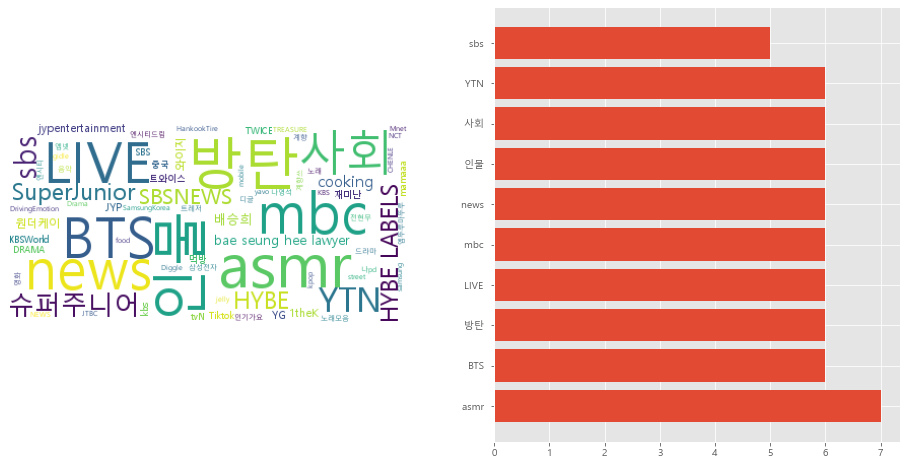

2021 하반기


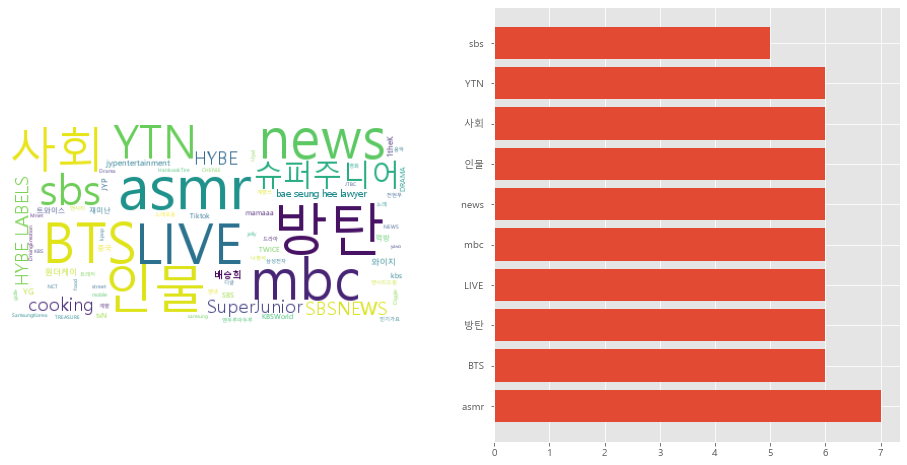

2022 상반기


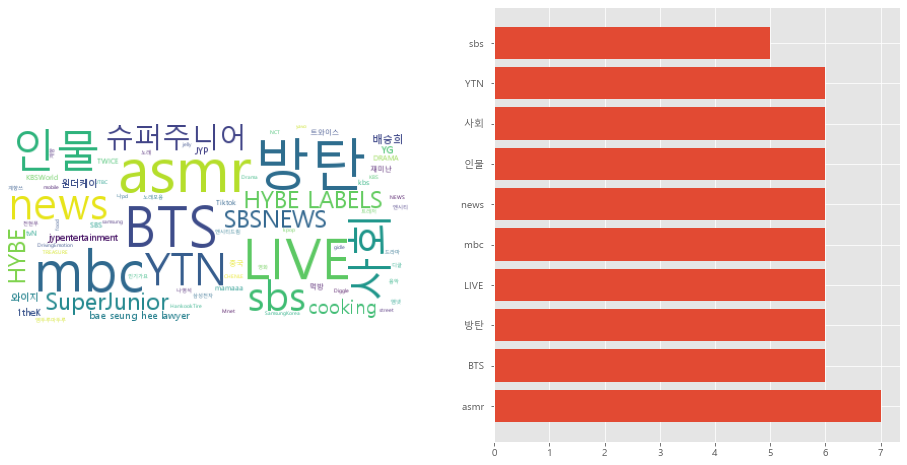

In [183]:
from wordcloud import WordCloud
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

times = ['2021 상반기', '2021 하반기', '2022 상반기']
q_tags = [month_tags[:6].sum(), month_tags[6:12].sum(), month_tags[12:].sum()]
for i in range(3):
    print(times[i])
    tag_counts = dict(pd.Series(q_tags[0]).str.lstrip(' #').value_counts())

    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(tag_counts)
    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    
    plt.axis('off')    
    plt.imshow(cloud)
    plt.subplot(1,2,2)
    plt.barh(list(tag_counts.keys())[:10], list(tag_counts.values())[:10])
    plt.show()